In [1]:
## basic xgboost tutorial
## using as baseline for more complex datasets + hyperparameter tuning
## tutorial url:
## https://www.datacamp.com/community/tutorials/xgboost-in-python
## xgboost documentation url (to be reviewed):
## https://xgboost.readthedocs.io/en/stable/

#### xgboost (Extreme Gradient Boosting) short description:
<br>
It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
boston = load_boston()
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


## Prediction + RMSE

#### Notes:
<br>
If you plan to use XGBoost on a dataset which has categorical features you may want to consider applying some encoding (like one-hot encoding) to such features before training the model. Also, if you have some missing values such as NA in the dataset you may or may not do a separate treatment for them, because XGBoost is capable of handling missing values internally.

In [5]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

preds[:5]

array([14.272665 ,  5.8608465,  4.489021 , 12.753138 ,  3.3708456],
      dtype=float32)

In [7]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 6.455243


## k-fold Cross Validation

In [8]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,12.902117,0.156682,12.933148,0.346261
1,11.845931,0.142842,11.874341,0.345186
2,10.888719,0.098074,10.928369,0.355488
3,10.036862,0.102325,10.106068,0.328625
4,9.282298,0.088875,9.368852,0.309637


In [9]:
## final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

49    3.995269
Name: test-rmse-mean, dtype: float64


## Visualize Boosting Trees and Feature Importance

<Figure size 864x720 with 0 Axes>

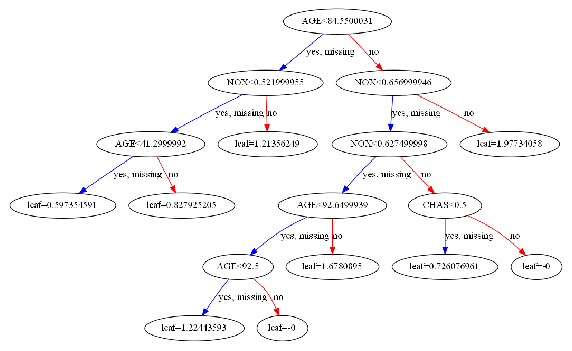

In [12]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

fig = plt.figure() 
fig.set_size_inches(12,10)

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

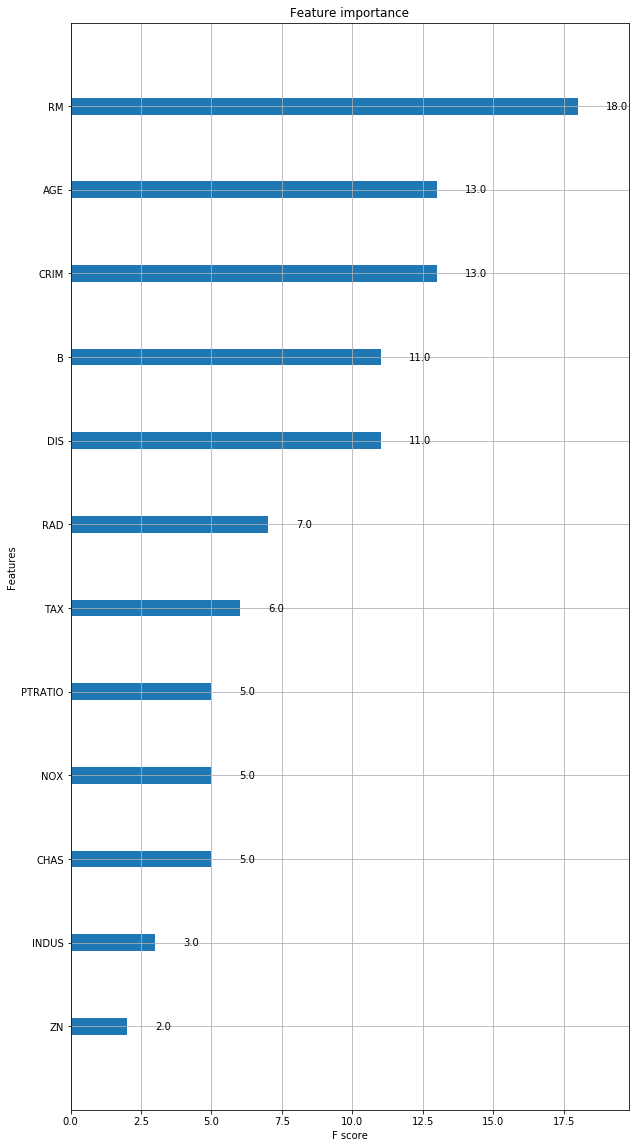

In [14]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 20]
plt.show()